
# Diagnóstico de Cáncer Mamario
# A)

### Utilizando el conjunto de datos de desarrollo breast_cancer_dev.csv desarrollar distintos modelos de regresión logística binaria con regularización L2, para cada uno aplicando una de las siguientes técnicas de re-balanceo. Para ajustar el hiper- parámetro de regularización puede utilizar F-Score como métrica de performance.

In [219]:
import sys
import os
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(ROOT_DIR)
sys.path.append('../src/')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from models import LogisticRegression, LogisticRegressionWithCostReweighting
from split import train_val_split
from metrics import recall_score, precision_score, f1_score, confusion_matrix, accuracy_score, plot_confusion_matrix
from metrics import plot_precision_recall_curve_s, plot_roc_curve, plot_both_curves
from sampling import undersampling, oversampling, smote

In [220]:
archivo_csv = '../data/raw/breast_cancer_dev.csv'
data = pd.read_csv(archivo_csv)
train_data, val_data = train_val_split(data, train_size=0.8)
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']
X_val = val_data.drop(columns=['target'])
y_val = val_data['target']
y_val_np = np.asarray(y_val)

threshold_ = 0.5

### 1) Sin aplicar ninguna técnica de re-balanceo.

Precision: 0.9091
Recall: 0.5556
Accuracy: 0.8861
F1 Score: 0.6897


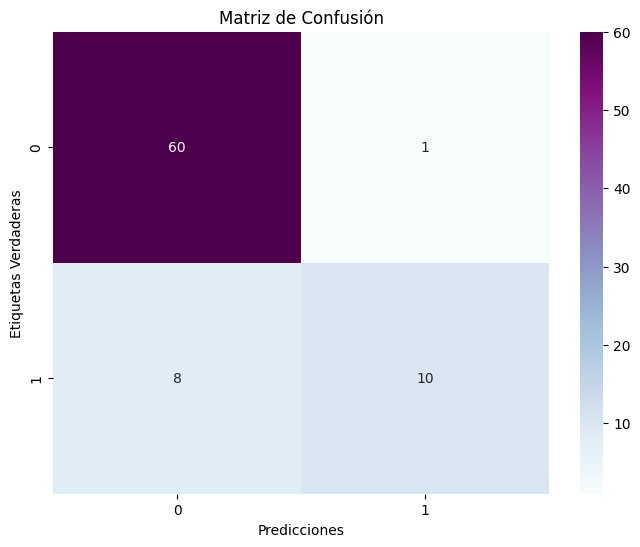

In [221]:
model_1 = LogisticRegression(max_iter=10000, learning_rate=0.1)
model_1.fit(X_train, y_train)
y_prob = model_1.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np = np.array(predictions)

precision = precision_score(y_val_np, y_pred_np)
recall = recall_score(y_val_np, y_pred_np)
accuracy = accuracy_score(y_val_np, y_pred_np)
f1 = f1_score(y_val_np, y_pred_np)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np, labels)
plot_confusion_matrix(matrix, labels)

### 2) Undersampling

Precision: 0.6154
Recall: 0.8889
Accuracy: 0.8481
F1-score: 0.7273


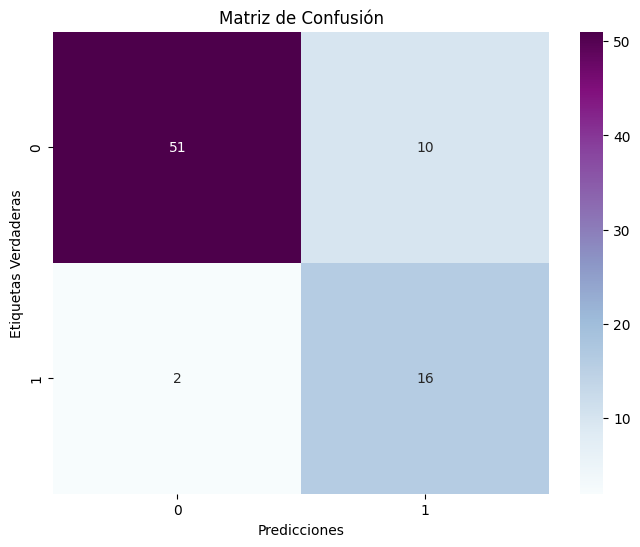

In [222]:

train = pd.concat([X_train, y_train], axis=1)
undersampled_train_data = undersampling(train)

u_X_train = undersampled_train_data.drop(columns=['target'])
u_y_train = undersampled_train_data['target']

model_2 = LogisticRegression(max_iter=10000, learning_rate=0.1)
model_2.fit(u_X_train, u_y_train)
y_prob = model_2.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np_U = np.array(predictions)

precision_u = precision_score(y_val, y_pred_np_U)
recall_u = recall_score(y_val, y_pred_np_U)
accuracy_u = accuracy_score(y_val, y_pred_np_U)
f1_u = f1_score(y_val, y_pred_np_U)
print(f'Precision: {precision_u:.4f}')
print(f'Recall: {recall_u:.4f}')
print(f'Accuracy: {accuracy_u:.4f}')
print(f'F1-score: {f1_u:.4f}')

labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np_U, labels)
plot_confusion_matrix(matrix, labels)

### 3) Oversampling

Precision: 0.6667
Recall: 0.8889
Accuracy: 0.8734
F1 Score: 0.7619


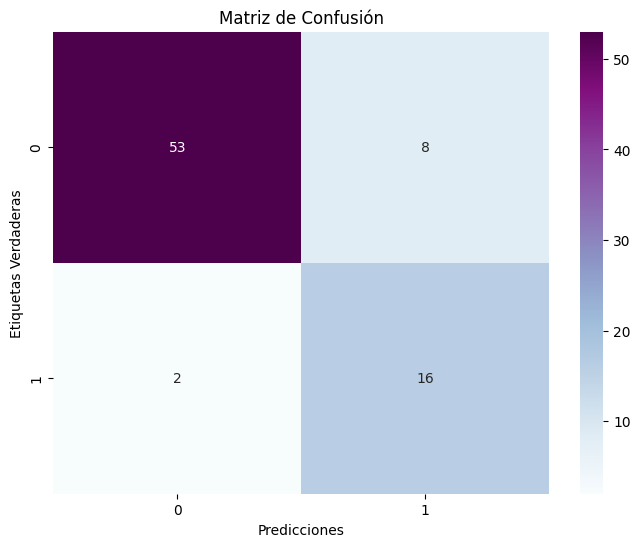

In [223]:
oversampled_train_data = oversampling(train)
o_X_train = oversampled_train_data.drop(columns=['target'])
o_y_train = oversampled_train_data['target']

model_3 = LogisticRegression(max_iter=10000, learning_rate=0.1)
model_3.fit(o_X_train, o_y_train)
y_prob = model_3.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np_O = np.array(predictions)
precision_o = precision_score(y_val_np, y_pred_np_O)
recall_o = recall_score(y_val_np, y_pred_np_O)
accuracy_o = accuracy_score(y_val_np, y_pred_np_O)
f1_o = f1_score(y_val_np, y_pred_np_O)
print(f'Precision: {precision_o:.4f}')
print(f'Recall: {recall_o:.4f}')
print(f'Accuracy: {accuracy_o:.4f}')
print(f'F1 Score: {f1_o:.4f}')

labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np_O, labels)
plot_confusion_matrix(matrix, labels)

### 4) SMOTE

Precision: 0.8889
Recall: 0.4444
Accuracy: 0.8608
F1 Score: 0.5926


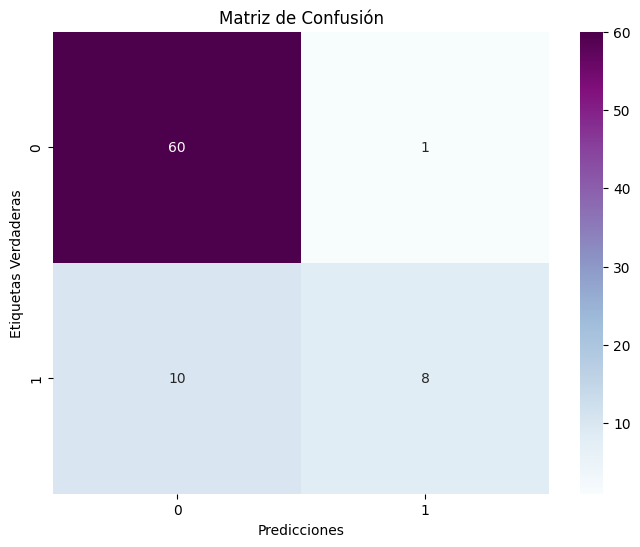

In [224]:
smote_sampled_train_data = smote(X_train, y_train)
sm_X_train = smote_sampled_train_data.drop(columns=['target'])
sm_y_train = smote_sampled_train_data['target']

model_smote = LogisticRegression(max_iter=10000, learning_rate=0.1)
model_smote.fit(sm_X_train, sm_y_train)
y_prob = model_smote.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np_sm = np.array(predictions)
precision_sm = precision_score(y_val_np, y_pred_np_sm)
recall_sm = recall_score(y_val_np, y_pred_np_sm)
accuracy_sm = accuracy_score(y_val_np, y_pred_np_sm)
f1_sm = f1_score(y_val_np, y_pred_np_sm)
print(f'Precision: {precision_sm:.4f}')
print(f'Recall: {recall_sm:.4f}')
print(f'Accuracy: {accuracy_sm:.4f}')
print(f'F1 Score: {f1_sm:.4f}')


labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np_sm, labels)

plot_confusion_matrix(matrix, labels)

#### Este resultado no es correcto, ya que smote debería funcionar igual o mejor que oversampling, pero no es el caso. El método de smote soversampling no está funcionando correctamente. Si probamos con smote de la librería imblearn este mostrará cómo tiene igual o mejor desempeño que el oversampling duplicate. 

Precision: 0.6957
Recall: 0.8889
Accuracy: 0.8861
F1 Score: 0.7805


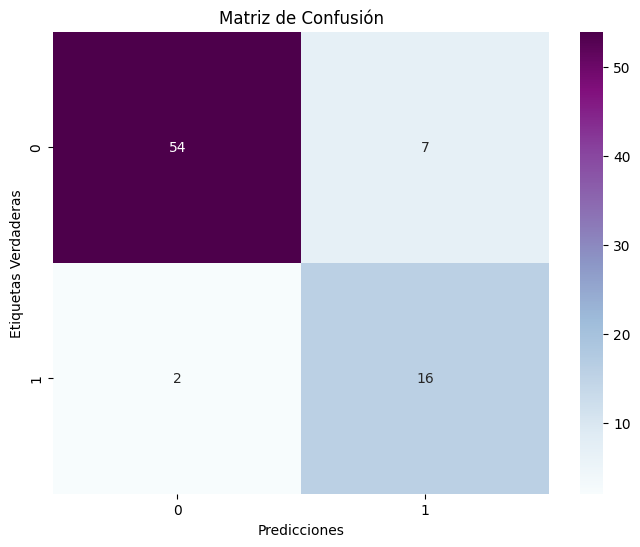

In [225]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
model_4 = LogisticRegression()
model_4.fit(X_train_res, y_train_res)
y_prob = model_4.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np_sm2 = np.array(predictions)

precision_sm2 = precision_score(y_val_np, y_pred_np_sm2)
recall_sm2 = recall_score(y_val_np, y_pred_np_sm2)
accuracy_sm2 = accuracy_score(y_val_np, y_pred_np_sm2)
f1_sm2 = f1_score(y_val_np, y_pred_np_sm2)
print(f'Precision: {precision_sm2:.4f}')
print(f'Recall: {recall_sm2:.4f}')
print(f'Accuracy: {accuracy_sm2:.4f}')
print(f'F1 Score: {f1_sm2:.4f}')

labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np_sm2, labels)
plot_confusion_matrix(matrix, labels)

Este modelo funciona mejor que el de oevrsampling duplicate, demostrando lo que ya sabiamos y dejando en evidencia que el smote creado desde cero contiene errores. 

### 5) Cost re-weighting

Precision: 0.6667
Recall: 0.8889
Accuracy: 0.8734
F1-score: 0.7619


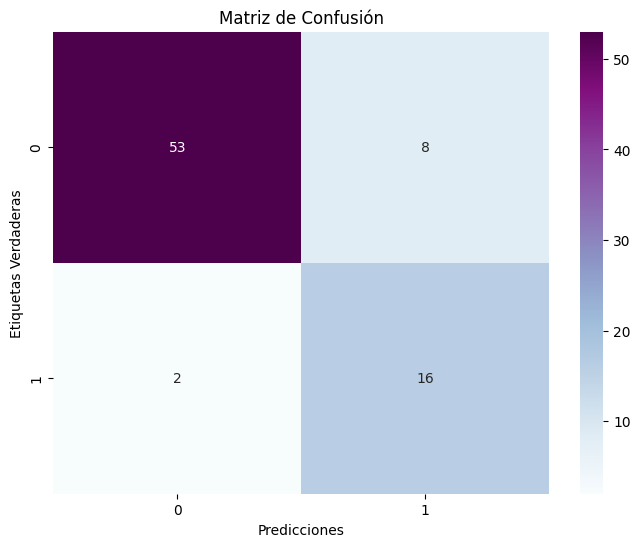

In [226]:
model_5 = LogisticRegressionWithCostReweighting(max_iter=10000, learning_rate=0.1)
model_5.fit(X_train, y_train)
y_prob = model_5.predict_proba(X_val)

predictions = []
for i in range(len(y_prob)):
    if y_prob[i][1] >= threshold_:
        predictions.append(1)
    else:
         predictions.append(0)

y_pred_np_crw = np.array(predictions)
precision_crw = precision_score(y_val, y_pred_np_crw)
recall_crw = recall_score(y_val, y_pred_np_crw)
accuracy_crw = accuracy_score(y_val, y_pred_np_crw)
f1_crw = f1_score(y_val, y_pred_np_crw)
print(f'Precision: {precision_crw:.4f}')
print(f'Recall: {recall_crw:.4f}')
print(f'Accuracy: {accuracy_crw:.4f}')
print(f'F1-score: {f1_crw:.4f}')

labels = [0, 1]
matrix = confusion_matrix(y_val_np, y_pred_np_crw, labels)
plot_confusion_matrix(matrix, labels)

# B)

### Utilizando el conjunto de datos de test breast_cancer_test.csv evalue la perfor- mance de cada uno de los modelos desarrollados anteriormente computando las siguientes métricas:
* Matriz de confusión
* Accuracy
* Precision
* Recall
* F-Score
* Curva PR
* Curva ROC
* AUC-ROC
* AUC-PR

In [227]:
archivo_csv = '../data/raw/breast_cancer_test.csv'
test = pd.read_csv(archivo_csv)
X_test = test.drop(columns=['target'])
y_test = test['target']


models = [model_1, model_2, model_3, model_4, model_5]
accuracies = []
precisions =[]
recalls = []
f_scores = []
auc_rocs = []
auc_prs = []
all_predictions = []


for i in range(len(models)):
    y_prob = models[i].predict_proba(X_test)
    predictions = []
    for i in range(len(y_prob)):
        if y_prob[i][1] >= threshold_:
            predictions.append(1)
        else:
            predictions.append(0)
    y_test_np = np.asarray(y_test)
    y_pred_test = np.array(predictions)
    all_predictions.append(y_pred_test)

    accuracy = accuracy_score(y_test_np, y_pred_test)
    accuracies.append(accuracy)
    precision = precision_score(y_test_np, y_pred_test)
    precisions.append(precision)
    recall = recall_score(y_test_np, y_pred_test)
    recalls.append(recall)
    f1 = f1_score(y_test_np, y_pred_test)
    f_scores.append(f1)
    auc_roc = plot_roc_curve(y_test_np, y_pred_test, just_result=True)
    auc_rocs.append(auc_roc)
    auc_pr = plot_precision_recall_curve_s(y_test_np, y_pred_test, just_result=True)
    auc_prs.append(auc_pr)

                   Modelo  Accuracy  Precision    Recall   F-Score   AUC-ROC  \
0          Sin rebalanceo  0.811594   0.600000  0.214286  0.315789  0.585065   
1           Undersampling  0.782609   0.470588  0.571429  0.516129  0.657143   
2  Oversampling duplicate  0.768116   0.444444  0.571429  0.500000  0.642857   
3      Oversampling SMOTE  0.797101   0.500000  0.571429  0.533333  0.671429   
4       Cost re-weighting  0.782609   0.470588  0.571429  0.516129  0.657143   

     AUR-PR  
0  0.486853  
1  0.564487  
2  0.551415  
3  0.579193  
4  0.564487  
Sin rebalanceo


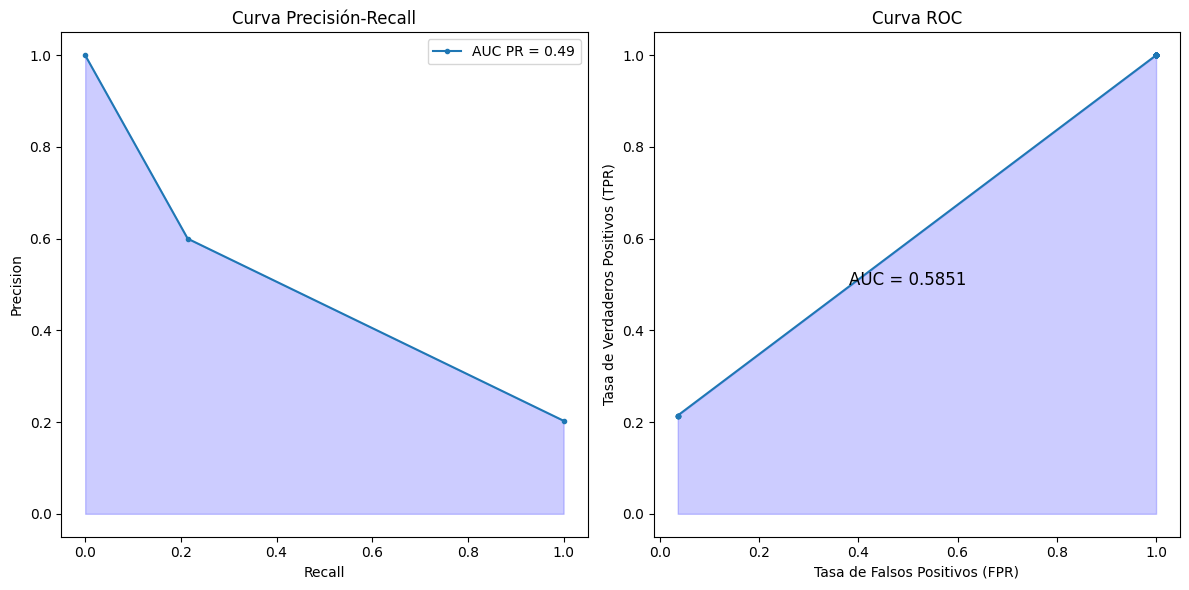

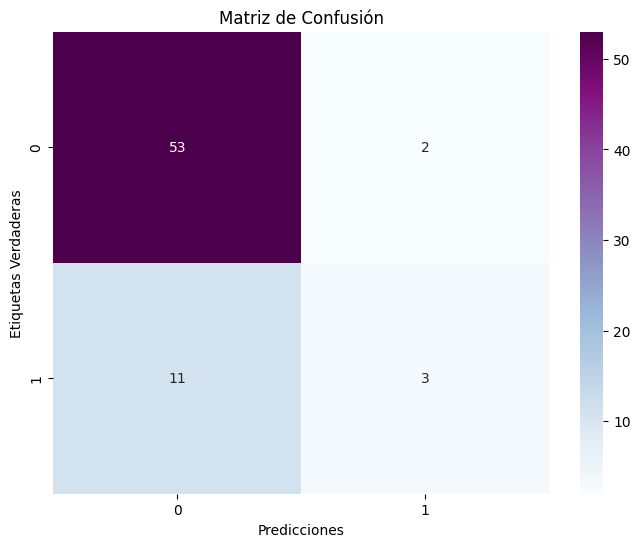

Undersampling


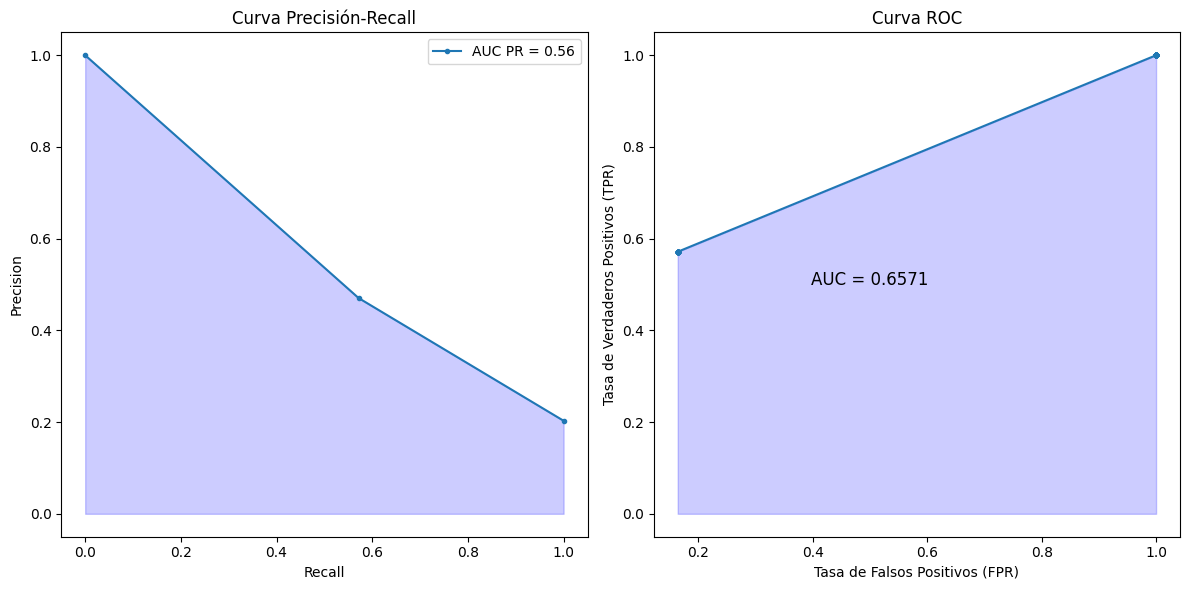

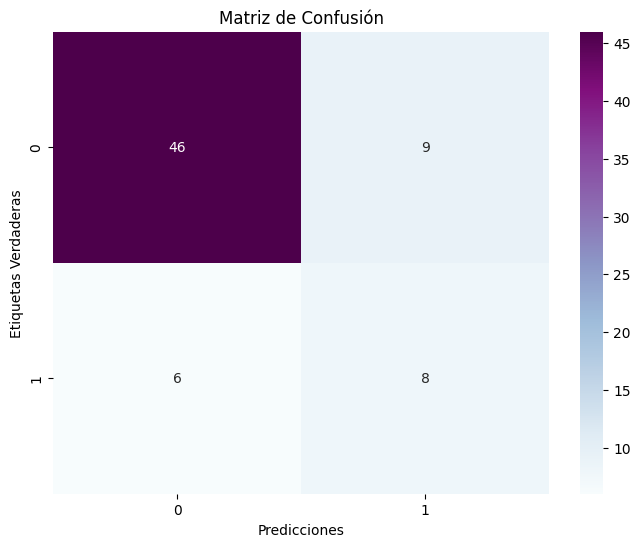

Oversampling duplicate


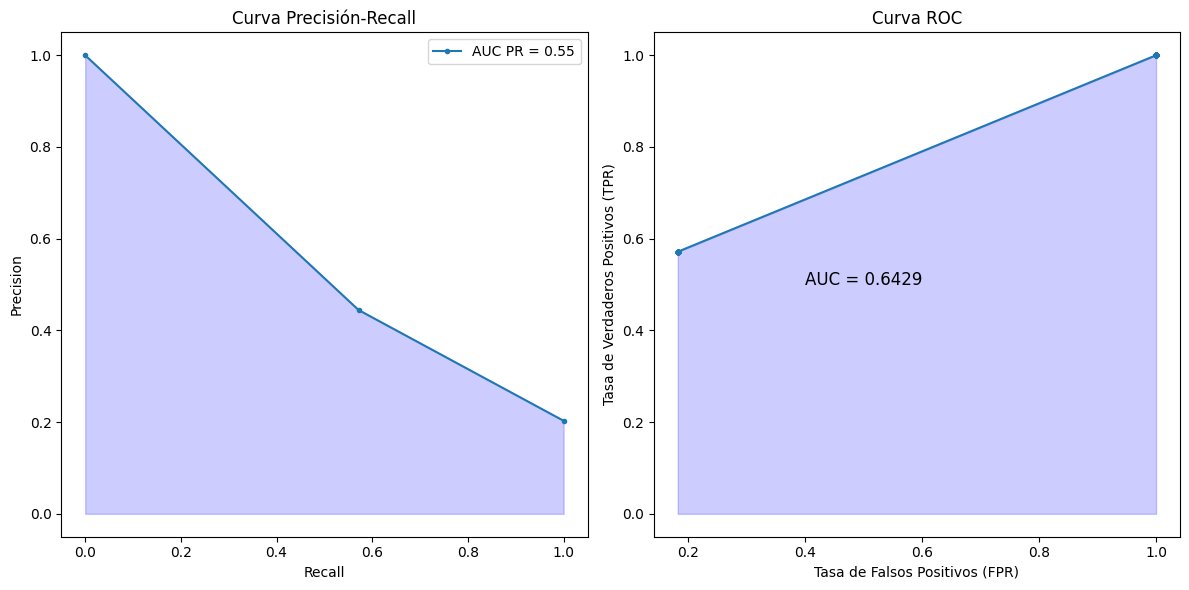

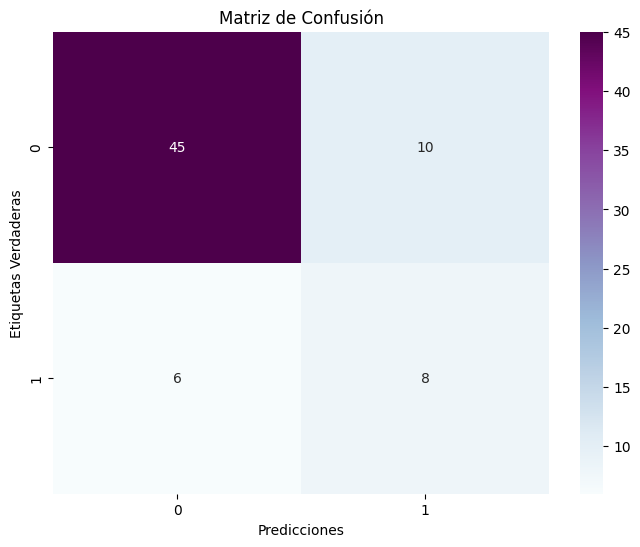

Oversampling SMOTE


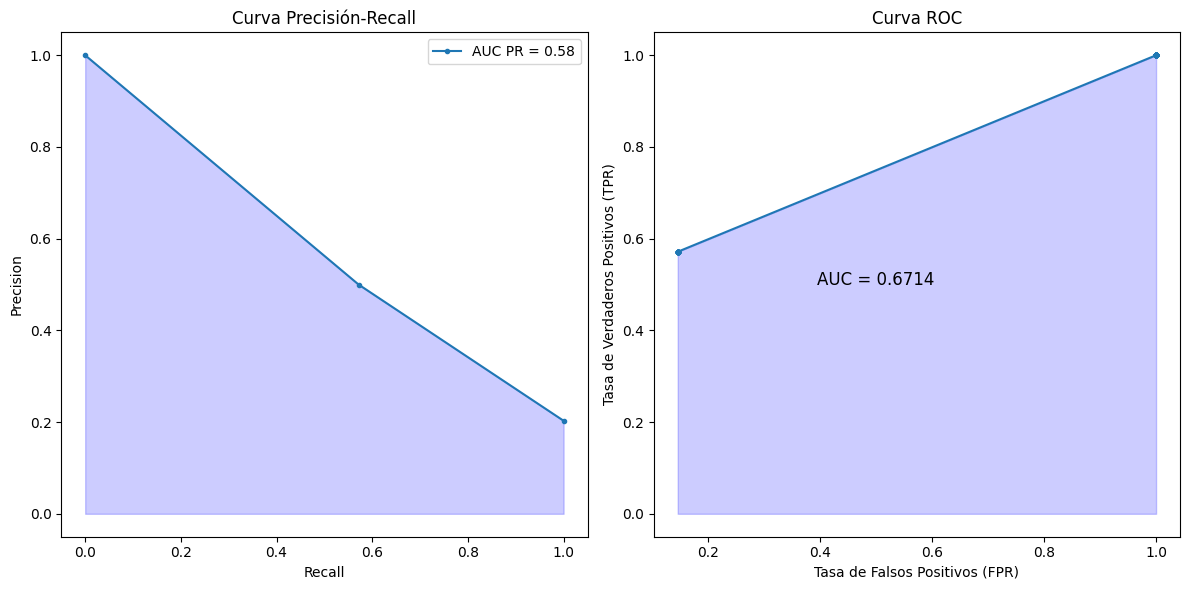

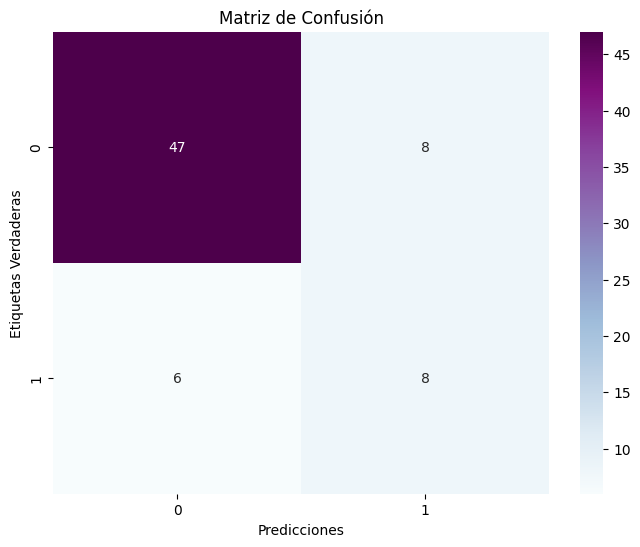

Cost re-weighting


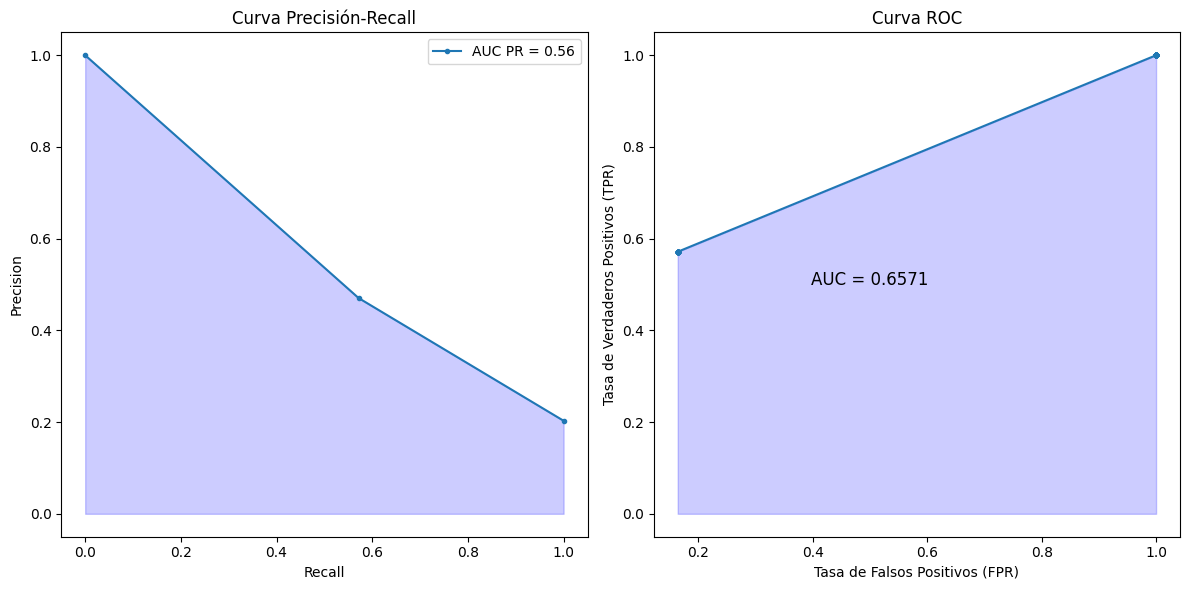

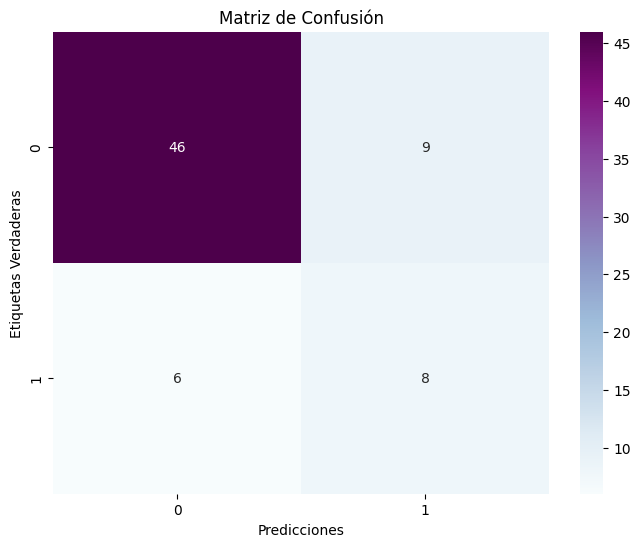

In [228]:
titles = ['Sin rebalanceo', 'Undersampling', 'Oversampling duplicate', 'Oversampling SMOTE', 'Cost re-weighting']


table = {
    'Modelo' : titles,
    'Accuracy': accuracies,
    'Precision' : precisions,
    'Recall' : recalls,
    'F-Score' : f_scores,
    'AUC-ROC' : auc_rocs,
    'AUR-PR' : auc_prs
}
df_table = pd.DataFrame(table)
print(df_table)


labels = [0, 1]
for i in range(5):
    print(titles[i])
    plot_both_curves(y_test_np, all_predictions[i])
    matrix = confusion_matrix(y_test_np, all_predictions[i], labels)
    plot_confusion_matrix(matrix, labels)



# C) 
### En base a los resultados obtenidos definir qué modelo enviará a producción (es decir, cual considera que es “el mejor”) y justifcar por qué.

Para definir qué modelo es mejor se debería tomar en cuenta el caso en el que se estaría aplicando. Dado a que este es la detección de tejidos cancerígenos, algo que se debería tener en cuenta es cómo manejas los falsos positivos y los falsos negativos. Dependiendo del cliente al cual se le está por brindar el servicio (sea un hospital o la ciencia misma), el costo de los falsos positivos y falsos negativos es distinto; el hospital no quiere perser recursos tratando a alguien que no tiene pero la ciencia no quiere mandar a casa a un paciente que está enfermo, ya que sin tratamiento este morirá. 

En este caso, como se quiere minimizar los falsos negativos se cosiderará como mejor modelo el que mayor RECALL tenga. Luego también se revisará que AUC-PR tiene y su AUC-ROC. 

Según las prediciones y sus métricas, el mejor modelo sería el de Smote Oversampling seguido por el Cost re-weighting. 